In [71]:
# Vaishnavi Sesetty
# 12/20/21
# CMSC320
# Final Tutorial

# In this tutorial, we are going to go through the process of ingesting a dataset and using Pythonn libraries
# such as Pandas to perform a meaningful statistical analysis of the dataset. The dataset I am choosing to analyze
# contains data of professional ATP level tennis matches in the year of 2017. With height being an important factor
# in tennis, I will analyze how a winning player's height affects the player's strategy in the match, including offensive techniques, 
# defensive techniques, and their ability to perform on different surfaces. I am going to compare statistics such as 
# number of aces served, number of first serves made successfully, number of double faults, number of first-serve points won,
# number of second-serve points won, number of break points faced, number of break points saved, duration of match, height of their opponent who lost and finally, number of wins on each surface
# based upon height. By analyzing all of this, we can deduce what a player's strategy who wins a match is based upon player height in a match.

# Here is the link to the data set: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2017.csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# In order to successfully be able to read this data, the link had to be replaced with the raw view of the data from the Github source,
# as the original link was leading to a ParserError from Pandas.

data = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv")


In [72]:
# My next step is tidying the data. Here I am creating a new dataframe called "ATP" which has all the columns I will need 
# for my analysis: surface, loser and winner heights in cms, winner number of aces, winner number of 
# double faults, winner number of first serves made, winner number of first-serve points won,
# winner number of second-serve points won, winner number of break points faced , duration of the match, and finally  
# and winner number of break points saved. I will be removing all matches with the column of 'tourney_level' being 'D' - this because, 'D'
# stands for Davis Cup, and this being a team event, individual player strategies may be overtaken by the strategies that the team 
# coach will want them to use, so this could skew results in terms of how player height affects individual player strategy. In addition, 
# I also removed any rows in which there is no round duration information available, as if there is no duration information available,
# that probably means that the match was won through a default means (withdrawl, etc.) and player strategy cannot be accurately measured in
# these cases. In addition, we have also removed all rows in which the winner and loser height is not available as this is important information
# that is required to perform this analysis.

ATP = data[data['tourney_level'] != 'D']


ATP = ATP[['winner_name', 'winner_ht', 'loser_ht', 'minutes', 'w_ace', 'w_df', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaced']]
ATP = ATP[ATP['minutes'].notnull()]
ATP = ATP[ATP['winner_ht'].notnull()]
ATP = ATP[ATP['loser_ht'].notnull()]

ATP


,winner_name,winner_ht,loser_ht,minutes,w_ace,w_df,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced
0,Viktor Troicki,193.0,170.0,91.0,11.0,5.0,45.0,35.0,6.0,1.0,3.0
2,Lucas Pouille,185.0,183.0,125.0,7.0,2.0,52.0,37.0,24.0,8.0,12.0
4,Jordan Thompson,183.0,183.0,90.0,1.0,0.0,28.0,26.0,6.0,1.0,2.0
5,David Ferrer,175.0,193.0,83.0,3.0,5.0,30.0,25.0,12.0,2.0,3.0
6,Grigor Dimitrov,188.0,188.0,75.0,3.0,0.0,25.0,23.0,12.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2891,Hyeon Chung,188.0,188.0,68.0,3.0,2.0,28.0,20.0,12.0,7.0,9.0
2893,Hyeon Chung,188.0,185.0,95.0,0.0,1.0,47.0,36.0,15.0,5.0,6.0
2896,Borna Coric,188.0,198.0,109.0,4.0,0.0,55.0,43.0,13.0,2.0,3.0
2898,Daniil Medvedev,198.0,198.0,110.0,2.0,4.0,47.0,33.0,21.0,3.0,5.0


In [73]:
# Now that we have all the data we need, we have to first aggregate player statistics for each of the winners so that we have 
# an average of their winning statistics for the entire 2017 ATP season. The only statistics that will need to be averaged are
# the number of aces, double faults, first serve points and second serve points won, loser height, duration of match, break points saved and break points faced. All
# the other statistics are constants that don't change per match so we will not average these (winner height and winner name).

agg_functions = {'winner_name': 'first', 'winner_ht' : 'first', 'loser_ht' : 'mean', 'minutes' : 'mean',
                'w_ace' : 'mean', 'w_df' : 'mean', 'w_1stIn' : 'mean', 'w_1stWon' : 'mean',
                'w_2ndWon' : 'mean', 'w_bpSaved' : 'mean', 'w_bpFaced' : 'mean'}

ATP = ATP.groupby(ATP['winner_name']).aggregate(agg_functions)

ATP


,winner_name,winner_ht,loser_ht,minutes,w_ace,w_df,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced
winner_name,,,,,,,,,,,
Adrian Mannarino,Adrian Mannarino,183.0,186.448276,114.172414,5.482759,2.241379,49.482759,35.689655,18.275862,3.931034,5.827586
Albert Montanes,Albert Montanes,175.0,188.000000,97.000000,1.000000,3.000000,45.000000,29.000000,17.000000,10.000000,13.000000
Albert Ramos,Albert Ramos,188.0,185.548387,139.483871,4.419355,2.516129,57.129032,40.354839,19.806452,4.258065,6.516129
Alejandro Falla,Alejandro Falla,185.0,183.000000,86.000000,2.000000,2.000000,45.000000,30.000000,11.000000,4.000000,6.000000
Alessandro Giannessi,Alessandro Giannessi,183.0,184.250000,145.000000,3.750000,2.500000,70.250000,46.500000,14.250000,8.750000,11.500000
...,...,...,...,...,...,...,...,...,...,...,...
Yen Hsun Lu,Yen Hsun Lu,180.0,187.000000,82.125000,4.500000,2.750000,37.125000,30.500000,14.375000,2.625000,3.625000
Yoshihito Nishioka,Yoshihito Nishioka,170.0,188.250000,108.375000,2.125000,1.500000,46.375000,31.625000,15.875000,4.875000,6.750000
Yuichi Sugita,Yuichi Sugita,173.0,186.222222,89.888889,3.111111,1.611111,42.555556,31.055556,13.222222,3.166667,4.444444


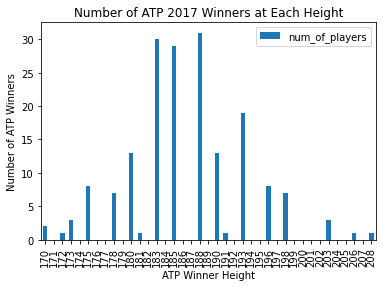

,atp_height,num_of_players
0,170,2
1,171,0
2,172,1
3,173,3
4,174,0
5,175,8
6,176,0
7,177,0
8,178,7
9,179,0


In [74]:
# The next step I want to do is perform a sanity check to ensure that there is a distrubtion that is spread
# out in erms of heights. This is to ensure that the question at hand has validity and that height can be a factor that affects
# player strategy. My logic behind this step is to find the minimum height and maximum height and then 
# create a distribution in which I create a range of heights from the minimum height to the maximum height with an increment of one between
# each value. From here, I can then count how many players belong to each height value which will create an overall
# ATP winners during 2017 height distribution. I will use iterrows() to go through each of the rows in the given dataframe, and then populate
# the x values (all possible values of heights) and y values (number of players that belong to each height value), and place them in a new datafram
# and then use the MatLab plt function to display this in a graph so that it can also be analyzed visually. Another note here is that the min height
# and max height values are converted to ints - the original data has integers in this column for the heights in centimeters, but when scraping the data
# this column was converted into floats so I had to reconvert them back in this step to ensure that it was compatible with 
# the range() function.

min_height = int(ATP['winner_ht'].min(axis = 0))
max_height = int(ATP['winner_ht'].max(axis = 0))

ATP_heights = pd.DataFrame({'atp_height': range(min_height, max_height + 1, 1), 'num_of_players' : 0})

for i, row in ATP.iterrows() :
    
    curr_height = ATP.loc[i, 'winner_ht']
    
    height_diff = int(curr_height - min_height)
    
    ATP_heights.iat[height_diff, 1] = ATP_heights.iat[height_diff, 1] + 1

# Plotting the distribution

ATP_heights.plot.bar(x = 'atp_height', y = 'num_of_players')

plt.title("Number of ATP 2017 Winners at Each Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Number of ATP Winners")

plt.show()

ATP_heights

# As we can see below, there is a pretty spread out distribution for the winner heights - it has almost the shape
# of a bell curve, and we can see that there are a lot of people who are average heighted, but there are still numerous players
# who are on the lower side or the higher side, which means that we can go forth with performing our initial
# analysis. 

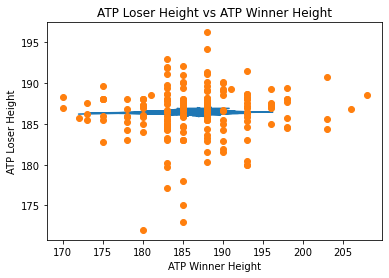

Correlation between ATP Winner height and loser height 0.06310709562703444


In [87]:
# So now we can begin to compare our first statistic with winner height: loser height. In this part, 
# we will see if winners height have any correlation with loser height. If a player being taller gives them 
# an advantage, then we should see a correlation between these two heights.

winner_data = ATP['winner_ht'].values
loser_data = ATP['loser_ht'].values

slope, intercept = np.polyfit(winner_data, loser_data, 1)

equation = slope * winner_data + intercept

plt.plot(loser_data, equation)

plt.plot(winner_data, loser_data, 'o')

plt.title("ATP Loser Height vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("ATP Loser Height")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and loser height " + str(correlation.loc['loser_ht', 'winner_ht']))

# As we can see below, the correlation between the winner height and loser height is around 0.06. This means 
# that there is not a siginificant correlation between these two variables, and being taller or shorter doesn't affect
# your ability to win a match overall.

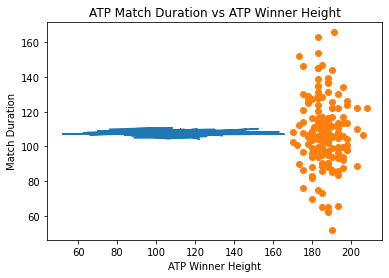

Correlation between ATP Winner height and match duration -0.06435699319644954


In [91]:
# The next variable to analyze is the duration of a match. In this analysis, we will see if a winning player's height
# affects the duration in which a match is completed. If a player has more of an advantage to win, we might expect to see that 
# a player might be able to win a match quicker the taller he is, which means in order for this to be true, we would need to see
# a negative correlation between winner height and duration of a match.

winner_data = ATP['winner_ht'].values
minutes = ATP['minutes'].values

slope, intercept = np.polyfit(winner_data, minutes, 1)

equation = slope * winner_data + intercept

plt.plot(minutes, equation)

plt.plot(winner_data, minutes, 'o')

plt.title("ATP Match Duration vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Match Duration")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and match duration " + str(correlation.loc['minutes', 'winner_ht']))

# Again, as we can see below, although the correlation coefficient is around -0.06 and is negative, this is not a significant
# correlation. This means that the winner's height doesn't necessarily affect the duration of the match.

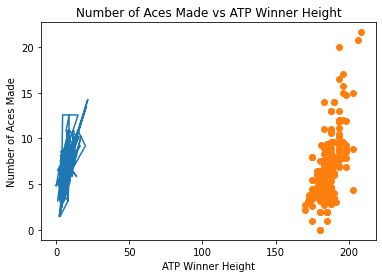

Correlation between ATP Winner height and number of aces made 0.6053351456621259


In [94]:
# The next variable to analyze is the number of aces made by a winner of the match. In this analysis, we will see if a winner player's height
# affects the number of aces made during a match. An ace is defined as a serve made by a player that 
# the player returning the serve is unable to reach/ touch - this is the best kind of serve a playe can do. When it comes to serving, taller players are known to have more of an advantage
# due to their reach and amount of power they can swing through the serve with, so I want to see if this is actually true. If there were to be a correlation,
# we would expect to see a positive correlation between player height and number of aces made.

winner_data = ATP['winner_ht'].values
num_of_aces = ATP['w_ace'].values

slope, intercept = np.polyfit(winner_data, num_of_aces, 1)

equation = slope * winner_data + intercept

plt.plot(num_of_aces, equation)

plt.plot(winner_data, num_of_aces, 'o')

plt.title("Number of Aces Made vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Number of Aces Made")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and number of aces made " + str(correlation.loc['w_ace', 'winner_ht']))

# As we can see, the correlation between these two variables is quite high, around 0.605 which is a significant positive correlation.
# This intuitevely means that a taller winner will serve more aces.


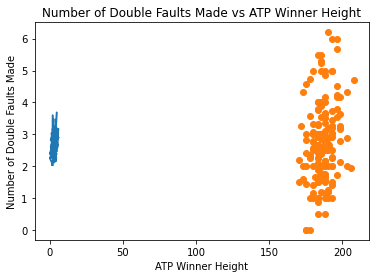

Correlation between ATP Winner height and number of double faults made 0.24376479542018326


In [95]:
# The next variable to analyze is the number of double faults made by the winner of a match. In this analyis,
# we will see if a player's height affects the number of double faults they make. A double fault is referred to when a player
# is unable to successfully make a first serve and a second serve, and therefore default loses the point. If a player's height affects
# the number of double faults they make, we would infer that they would make less double faults the taller they are,
# as they have more of an advantage with serving (and also taking into account that they won the match) - this means that we would see a negative correlation between height and
# number of double faults made.

winner_data = ATP['winner_ht'].values
num_of_df = ATP['w_df'].values

slope, intercept = np.polyfit(winner_data, num_of_df, 1)

equation = slope * winner_data + intercept

plt.plot(num_of_df, equation)

plt.plot(winner_data, num_of_df, 'o')

plt.title("Number of Double Faults Made vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Number of Double Faults Made")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and number of double faults made " + str(correlation.loc['w_df', 'winner_ht']))

# As we can see, there is a correlation of about 0.24 between height and number of double faults made. This actually goes against
# what I thought would happen, as we can see that there is actually a moderate positive correlation which means that the taller a player is,
# the more double faults they are likely to actually make. This means that taller players make more double faults than shorter players.

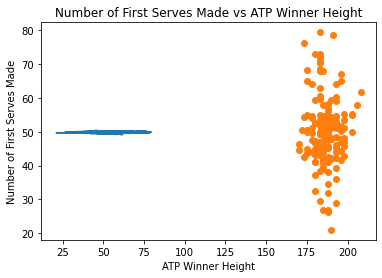

Correlation between ATP Winner height and number of first serves made -0.022602936578333108


In [96]:
# The next variable to analyze is the number of first serves that a winner makes in. In this analysis, we will 
# see if a player's height affects their ability to make more first serves. Especially because we are looking at 
# winner player height, we would think that they win a higher amount of first serve points in general, so we might expect
# to see a positive correlation between these two variables. 

winner_data = ATP['winner_ht'].values
num_of_first = ATP['w_1stIn'].values

slope, intercept = np.polyfit(winner_data, num_of_first, 1)

equation = slope * winner_data + intercept

plt.plot(num_of_first, equation)

plt.plot(winner_data, num_of_first, 'o')

plt.title("Number of First Serves Made vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Number of First Serves Made")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and number of first serves made " + str(correlation.loc['w_1stIn', 'winner_ht']))

# As we can see below, there is a very low negative correlation between ATP winner height and number of first serves made.
# This means that there is no siginificnat correlation between these two variables, and winner player height probably doesn't 
# affect the number of first serves made.


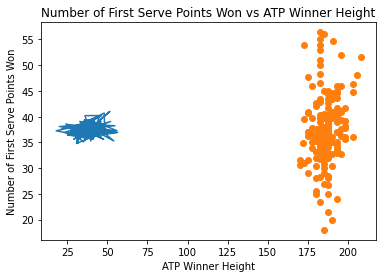

Correlation between ATP Winner height and number of first serve points won 0.16581262514067996


In [97]:
# The next variable that will be analyzed is the number of first serve points won. First serve points won
# are points that a player wins off of their first serve. Because we are looking at winner heights, we would expect that they win
# a greater amount of these points in general. We want to see if height affects the number of first serve points won.

winner_data = ATP['winner_ht'].values
num_of_first_won = ATP['w_1stWon'].values

slope, intercept = np.polyfit(winner_data, num_of_first_won, 1)

equation = slope * winner_data + intercept

plt.plot(num_of_first_won, equation)

plt.plot(winner_data, num_of_first_won, 'o')

plt.title("Number of First Serve Points Won vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Number of First Serve Points Won")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and number of first serve points won " + str(correlation.loc['w_1stWon', 'winner_ht']))

# As we can see, there is around a 0.17 correlation between these two variables. So, we can conclude that there is a weak positive correlation
# between winning player height and number of first serve points won, and that a taller player has a slightly higher chance
# of winning more first serve points.


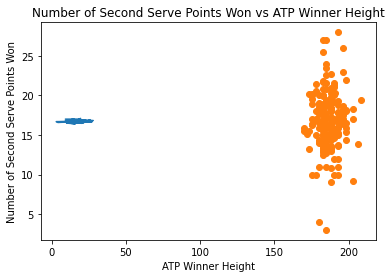

Correlation between ATP Winner height and number of second serve points won 0.03322580484421437


In [98]:
# The next variable that will be analyzed is the number of second serve points won. Second serve points won
# are points that a player wins off of their second serve. Because we are looking at winner heights, we would expect that they win
# a greater amount of these points in general. We want to see if height affects the number of second serve points won.

winner_data = ATP['winner_ht'].values
num_of_sec_won = ATP['w_2ndWon'].values

slope, intercept = np.polyfit(winner_data, num_of_sec_won, 1)

equation = slope * winner_data + intercept

plt.plot(num_of_sec_won, equation)

plt.plot(winner_data, num_of_sec_won, 'o')

plt.title("Number of Second Serve Points Won vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Number of Second Serve Points Won")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and number of second serve points won " + str(correlation.loc['w_2ndWon', 'winner_ht']))

# As we can see, there is a 0.03 correlation between winning player height and number of second serve points won.
# So, we know that there is no siginificant correlation between a player's height and number of second serve points won.

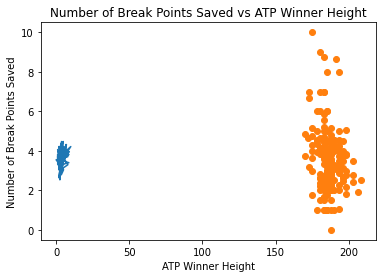

Correlation between ATP Winner height and number of break points saved -0.2167194736200483


In [100]:
# The next variable that will be analyzed is the number of break points saved. A break point is defined 
# as a point that the opponent has in which they will win the other player's serving game - so the returning player wins
# the game in which the other player is serving in. In this, we are seeing how many break points the player serving (the winner), 
# has saved to not give their game away to their opponent. Because we are looking at winning players heights, we might expect to see that 
# a winner will save more of these break points in general, and we want to see if their height gives them more of an advantage as well, so we 
# might expect to see a positive correlation.

winner_data = ATP['winner_ht'].values
num_of_break_saved = ATP['w_bpSaved'].values

slope, intercept = np.polyfit(winner_data, num_of_break_saved, 1)

equation = slope * winner_data + intercept

plt.plot(num_of_break_saved, equation)

plt.plot(winner_data, num_of_break_saved, 'o')

plt.title("Number of Break Points Saved vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Number of Break Points Saved")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and number of break points saved " + str(correlation.loc['w_bpSaved', 'winner_ht']))


# As we can see, there is actually a moderate negative correlation between winning player height and number of break points saved of
# around -0.22. This means that a taller player may actually save less break points and have more of a disadvantage in that regards.


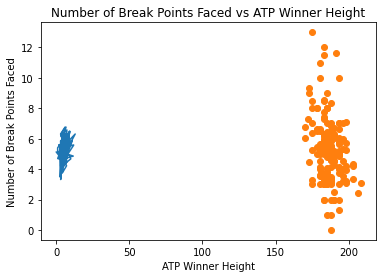

Correlation between ATP Winner height and number of break points faced -0.292273808272424


In [102]:
# The next variable that will be analyzed is the number of break points faced. A break point is defined 
# as a point that the opponent has in which they will win the other player's serving game - so the returning player wins
# the game in which the other player is serving in. In this, we are seeing how many break points the player serving (the winner), 
# has faced. Because we are looking at winning players heights, we might expect to see that 
# a winner will face less break points in general, and we want to see if their height gives them more of an advantage as well, so we 
# might expect to see a negative correlation.

winner_data = ATP['winner_ht'].values
num_of_break_faced = ATP['w_bpFaced'].values

slope, intercept = np.polyfit(winner_data, num_of_break_faced, 1)

equation = slope * winner_data + intercept

plt.plot(num_of_break_faced, equation)

plt.plot(winner_data, num_of_break_faced, 'o')

plt.title("Number of Break Points Faced vs ATP Winner Height")

plt.xlabel("ATP Winner Height")
plt.ylabel("Number of Break Points Faced")

plt.show()

correlation = ATP.corr()
print("Correlation between ATP Winner height and number of break points faced " + str(correlation.loc['w_bpFaced', 'winner_ht']))


# As we can see, there is actually a moderate negative correlation between winning player height and number of break points faced of
# around -0.29. This means that a taller player may actually face less break points and have more of an advantage in that regards.


In [ ]:
# So this is what we learned from the final results:
# When looking at ATP winners in 2017, we can see that although a player won a match, that doesn't necessarily
# mean that a taller player is more likely to beat someone shorter than them - there is no correlation between winning player height
# and loser player height.
# In addition, there is also no correlation between a winning player's height and the duration of a match. Even though sometimes it may make 
# sense that if a player wins a match, they might be more likely to win it quicker if their height gives them an advantage (especially in lower time-consuming shots like serves), 
# we can see that through this analysis, there is no correlation.
# In addition, we also see that taller players are more likely to make more aces, which means they have a bit more advantage
# in the offensive play strategy. Interestingly, we also see that winning players who are taller also make more double faults as opposed
# to shorter players. This may be because they attempt more serves and aces, which means they also miss these shots more often.
# In addition, there is no correlation between the height of a winning player and the number of first serves they make so this means that
# taller players don't have more of an advantage of more accurately making a first serve as opposed to shorter players.
# We did see a slight correlation between player height and number of first serve points won, which tells us that a taller player
# may have more advantage in their offensive strategy when they serve for the game, and win their first serve points.
# We can see that there is no correlation between height and number of second serve points won, which means that taller players don't have
# an advantage in this regard.
# Finally, when it comes to break points, although taller players seems to face less break points in general (which means they have an advantage in their defensive play),
# when they do face a break point, they are more likely to lose them, which means that in situations of high pressue and defensive play is required, taller player
# may have a disadvantage.

# From all of this we can conclude that in terms of serving, winning taller players are more likely to attempt more first serves (probably due to a higher confidence level with their height)
# and tend to make more aces. As someone who played tennis, I know that taller players tend to have an advantage in this regard so 
# this makes sense. So a winning taller players strategy in 2017 contained more offensive strategies in terms of aces and first serves, but also 
# making more double faults as opposed to shorter players, and in addition, when it came to defense, they were better at preventing themselves
# from being in a situation in which points like break points were faced, but when facing a break point, they had more of a disadvantage with saving them.
# This can interpreted as taller players definetly do have an advantage in certain parts of the game, but height is certainly not a main factor
# of whether a player peforms well during a match or even wins a match (as we can see with the no correlation between winner and loser height).

# This article delves a bit into height and if it gives ATP men players an advantage. One interesting thing to 
# note in this article too, is one of the first things the author mentions is the advantage height 
# tends to give when serving, and as seen, our data shows just that.

# So overall in this tutorial, we have learned to scrape data from websites in Python, tidy the data and clean up the data in the manner that you want to,
# create plots and visually analyze data, perform linear regressions and from their interpret the correlation between variables. 

# I hope this tutorial helped in gaining a greater understanding of how ATP winner player height affects their tennis match strategy in the year of 2017.